# Exploratory Data Analysis (EDA)

This notebook explores the relationships between the different features extracted from the play information. The following questions are addressed:
- What is the distribution between positive and negative yards plays?
- What is the distribution between the different play outcomes?
- What is the distribution and proportion of fouls called?

**Insights**
- The number of complete passes is really balanced - This is great for prediction purposes
- Fouls are a minority class (expected), and they are slightly biased towards defensive fouls (40/60)
- Similar analysis for the Injury distribution

# 0. Load libraries and constants

In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries required for plotting field
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation
from IPython.display import HTML

# Custom libraries
sys.path.append('../')
from src.utils.feature_extraction import extract_play_outcome_features, extract_formation_features, extract_foul_features, extract_injury_features
from definitions.fouls_def import ignore_fouls

In [2]:
# Define input parameters
input_path = '../input'

In [3]:
plays_data = pd.read_csv(os.path.join(input_path, 'plays.csv'))
plays_data.head(5)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [4]:
# Perform all feature extractions
plays_outcomes = extract_play_outcome_features(plays_data)
plays_formation = extract_formation_features(plays_data)
plays_fouls = extract_foul_features(plays_data)
plays_injury = extract_injury_features(plays_data)

# 1. EDA - Feature Data
## 1.1 Play Outcomes
This represents the most important bit of information, and very likely the main feature / label that we will use for training. We will evaluate:
- Correlation of play outcome and yards gained
- Distribution of outcomes

In [41]:
plays_outcomes.head(5)

,gameId,playId,pass_complete,has_pocket_hold,was_qb_sacked,achieved_pos_yards,gained_yards,touchdown,pass_incomplete
0,2021090900,97,False,True,False,False,0,False,True
1,2021090900,137,True,True,False,True,28,False,False
2,2021090900,187,True,True,False,True,5,False,False
3,2021090900,282,False,True,False,False,0,False,True
4,2021090900,349,False,True,False,False,0,False,True


Text(0, 0.5, 'Gained yards')

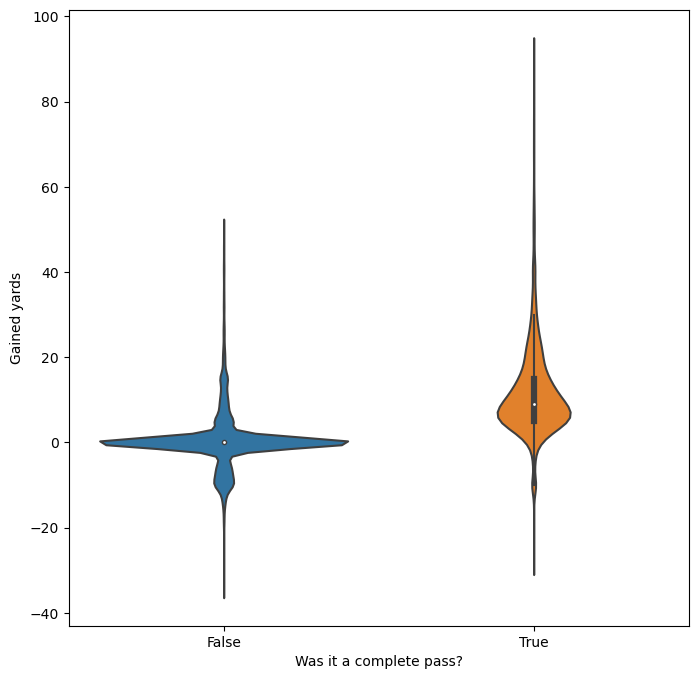

In [6]:
plt.figure(figsize=(8,8))
sns.violinplot(data=plays_outcomes, y='gained_yards', x='pass_complete')
plt.xlabel("Was it a complete pass?")
plt.ylabel("Gained yards")

Text(0, 0.5, 'Gained yards')

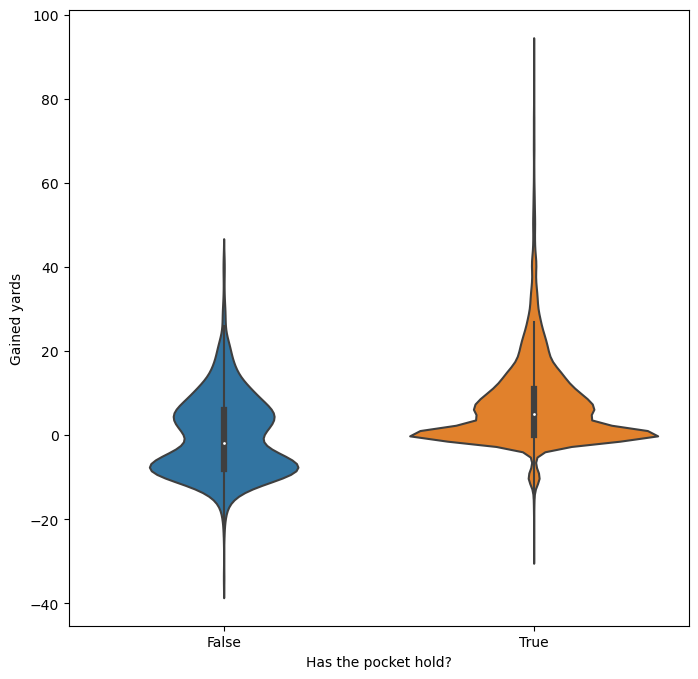

In [11]:
plt.figure(figsize=(8,8))
sns.violinplot(data=plays_outcomes, y='gained_yards', x='has_pocket_hold')
plt.xlabel("Has the pocket hold?")
plt.ylabel("Gained yards")

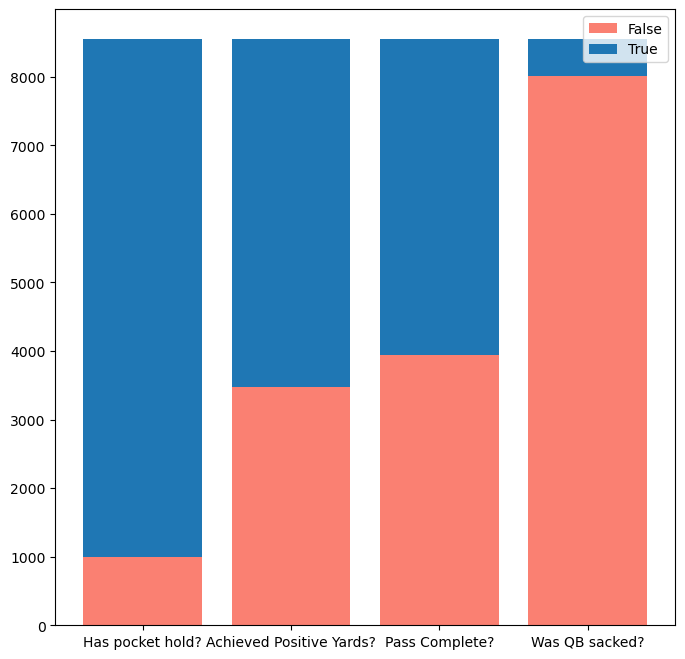

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
data = pd.DataFrame({
    "Has pocket hold?": plays_outcomes.has_pocket_hold.value_counts(),
    "Achieved Positive Yards?": plays_outcomes.achieved_pos_yards.value_counts(),
    "Pass Complete?": plays_outcomes.pass_complete.value_counts(),
    "Was QB sacked?": plays_outcomes.was_qb_sacked.value_counts(),
    })
x_labels = [
    "Has pocket hold?", 
    "Achieved Positive Yards?", 
    "Pass Complete?",
    "Was QB sacked?"
]
ax.bar(x=x_labels, height=data.iloc[0], label='False', color='Salmon')
ax.bar(x=x_labels, height=data.iloc[1], bottom=data.iloc[0], label='True')
ax.legend()

## 1.2 Play Fouls
To better understand how these features might be used, we will look at the absolute number as well as the distribution of these fouls

In [43]:
plays_fouls.head(5)

,gameId,playId,num_off_foul,off_penalties,off_penalties_players,num_def_foul,def_penalties,def_penalties_players
0,2021090900,97,0,[],[],0,[],[]
1,2021090900,137,0,[],[],0,[],[]
2,2021090900,187,0,[],[],0,[],[]
3,2021090900,282,0,[],[],0,[],[]
4,2021090900,349,0,[],[],0,[],[]


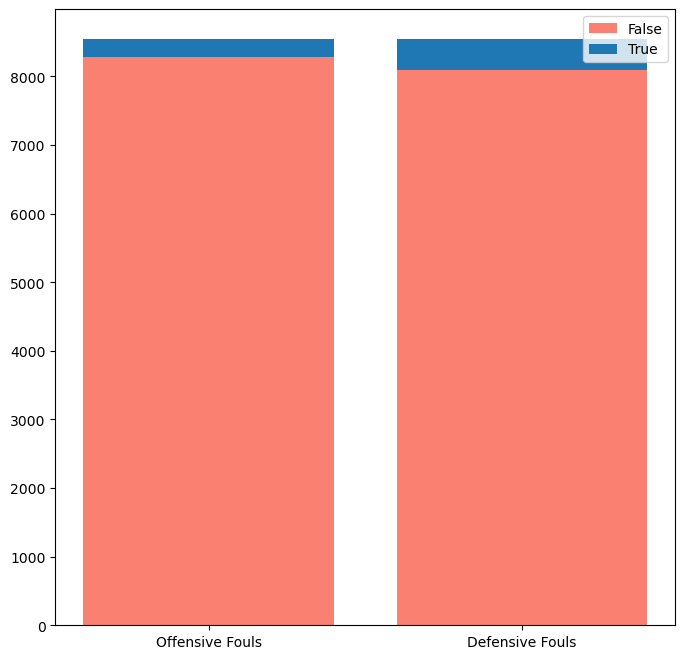

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
data = pd.DataFrame({
    "Offensive Fouls": plays_fouls.num_off_foul.value_counts(),
    "Defensive Fouls": plays_fouls.num_def_foul.value_counts(),
    })
x_labels = [
    "Offensive Fouls", 
    "Defensive Fouls"
]
ax.bar(x=x_labels, height=data.iloc[0], label='False', color='Salmon')
ax.bar(x=x_labels, height=data.iloc[1], bottom=data.iloc[0], label='True')
ax.legend()

In [58]:
offensive_fouls = sum((data['Offensive Fouls'] * data.index).dropna())
defensive_fouls = sum((data['Defensive Fouls'] * data.index).dropna())

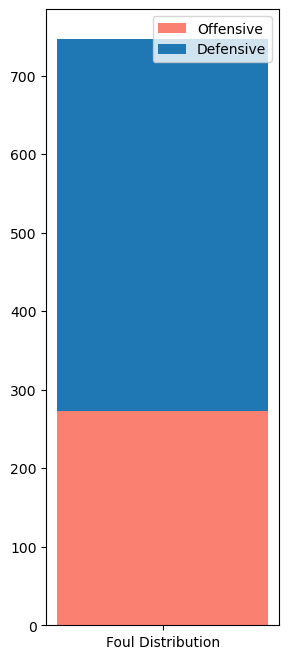

In [70]:
fig, ax = plt.subplots(figsize=(3,8))
data = pd.DataFrame({
    "Foul Distribution": [offensive_fouls, defensive_fouls],
    })
x_labels = [
    "Foul Distribution"
]
ax.bar(x=x_labels, height=data.iloc[0], label='Offensive', color='Salmon')
ax.bar(x=x_labels, height=data.iloc[1], bottom=data.iloc[0], label='Defensive')
ax.legend()

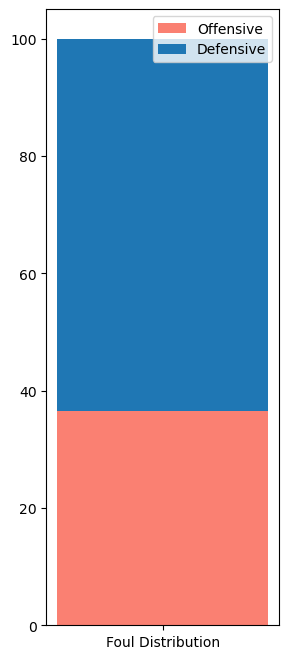

In [71]:
total = offensive_fouls + defensive_fouls

fig, ax = plt.subplots(figsize=(3,8))
data = pd.DataFrame({
    "Foul Distribution": [(offensive_fouls/total) * 100.0, (defensive_fouls/total) * 100.0],
    })
x_labels = [
    "Foul Distribution"
]
ax.bar(x=x_labels, height=data.iloc[0], label='Offensive', color='Salmon')
ax.bar(x=x_labels, height=data.iloc[1], bottom=data.iloc[0], label='Defensive')
ax.legend()

## 1.3 Play Injuries
To better understand how these features might be used, we will look at the absolute number as well as the distribution of these injuries - same analysis as fouls

In [66]:
plays_injury.head(5)

,gameId,playId,num_off_injuries,off_players_injured,num_def_injuries,def_players_injured
0,2021090900,97,0,[],0,[]
1,2021090900,137,0,[],0,[]
2,2021090900,187,0,[],0,[]
3,2021090900,282,0,[],0,[]
4,2021090900,349,0,[],0,[]


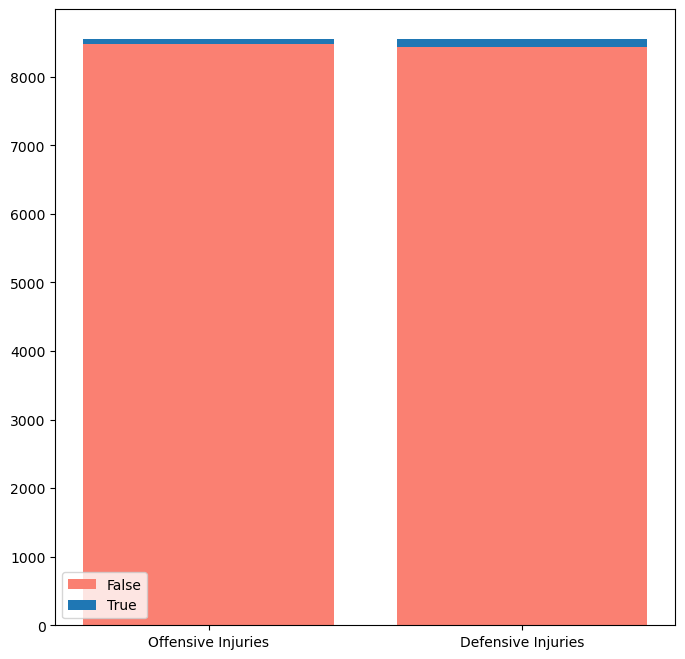

In [67]:
fig, ax = plt.subplots(figsize=(8,8))
data = pd.DataFrame({
    "Offensive Injuries": plays_injury.num_off_injuries.value_counts(),
    "Defensive Injuries": plays_injury.num_def_injuries.value_counts(),
    })
x_labels = [
    "Offensive Injuries", 
    "Defensive Injuries"
]
ax.bar(x=x_labels, height=data.iloc[0], label='False', color='Salmon')
ax.bar(x=x_labels, height=data.iloc[1], bottom=data.iloc[0], label='True')
ax.legend()

In [68]:
offensive_injuries = sum((data['Offensive Injuries'] * data.index).dropna())
defensive_injuries = sum((data['Defensive Injuries'] * data.index).dropna())

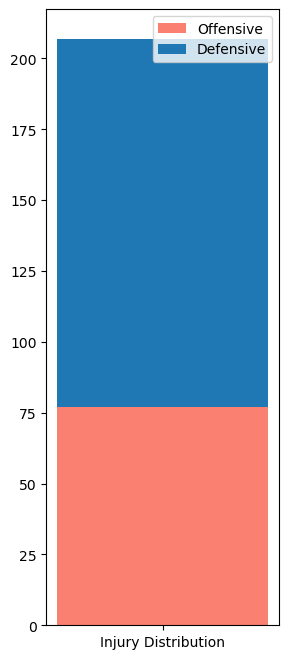

In [72]:
fig, ax = plt.subplots(figsize=(3,8))
data = pd.DataFrame({
    "Injury Distribution": [offensive_injuries, defensive_injuries],
    })
x_labels = [
    "Injury Distribution"
]
ax.bar(x=x_labels, height=data.iloc[0], label='Offensive', color='Salmon')
ax.bar(x=x_labels, height=data.iloc[1], bottom=data.iloc[0], label='Defensive')
ax.legend()

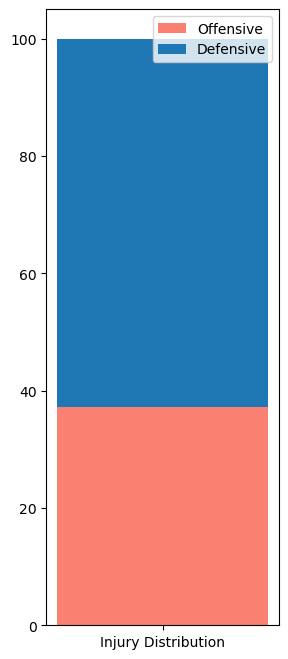

In [73]:
total = offensive_injuries + defensive_injuries

fig, ax = plt.subplots(figsize=(3,8))
data = pd.DataFrame({
    "Injury Distribution": [(offensive_injuries/total) * 100.0, (defensive_injuries/total) * 100.0],
    })
x_labels = [
    "Injury Distribution"
]
ax.bar(x=x_labels, height=data.iloc[0], label='Offensive', color='Salmon')
ax.bar(x=x_labels, height=data.iloc[1], bottom=data.iloc[0], label='Defensive')
ax.legend()

# 2. EDA - Field Data
This section will test different visualization options for the game data

In [74]:
week1_data = pd.read_csv(os.path.join(input_path, 'week1.csv'))
week1_data.head(5)

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


team
DAL         AxesSubplot(0.125,0.11;0.775x0.77)
TB          AxesSubplot(0.125,0.11;0.775x0.77)
football    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

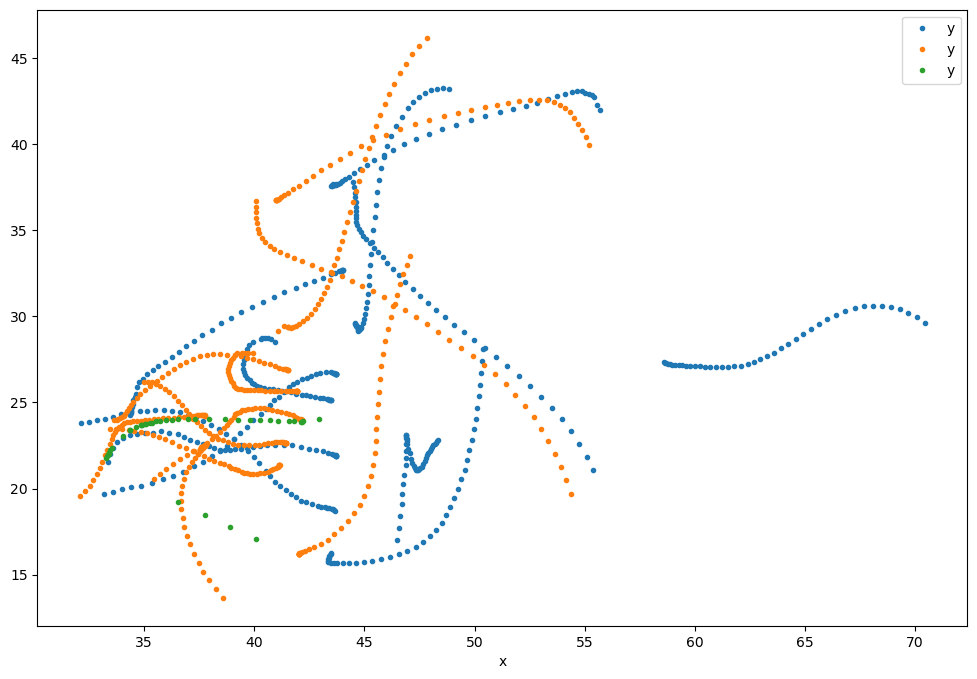

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))
week1_data.query('gameId == 2021090900 and playId == 97').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove()

In [193]:
def extractPlay(week_data, gameId, playId, input_path = "../input/"):

    # Extract information from gameId and playId
    play_data = week_data.query(f'gameId == {gameId} and playId == {playId}')

    # Determine which teams are playing
    teams = play_data.loc[play_data.team != "football", "team"].unique()

    # Extract information about what team is offensive
    plays_info = pd.read_csv(os.path.join(input_path, 'plays.csv')).query(f'gameId == {gameId} and playId == {playId}')
    off_team = plays_info.possessionTeam.values[0]

    # Extract information for each team
    for team in teams:
        if team == off_team:
            team1 = play_data.loc[play_data.team == teams[0], ['frameId', 'nflId', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event']]
        else:
            team2 = play_data.loc[play_data.team == teams[1], ['frameId', 'nflId', 'x', 'y', 's', 'a', 'dis', 'o', 'dir','event']]

    # Extract information about the ball
    ball = play_data.loc[play_data.team == "football", ['frameId', 'x', 'y', 's', 'a', 'dis', 'event']]

    return team1, team2, ball
    

## 2.1 Full Field visualization

In [194]:
# Figure visualization, inspired by https://www.kaggle.com/code/jaronmichal/tracking-data-visualization/notebook
# De-parametrized it, setting the field to 100 x 53.3 yards 
def drawPitch():

    # Constant parameters
    width = 100
    height = 53.3
    color = "w"

    # Create figure object
    fig = plt.figure(figsize=(20, 16))
    ax = plt.axes(xlim=(-10, width + 30), ylim=(-15, height + 5))
    plt.axis('off')

    ###################
    # Create a rectangle - Entire field
    # xy = Anchor point
    # width = Length of the field (included side of the field, 10 yards)
    # height = Height of the field (included side of the field, 5 yards)
    rect = patches.Rectangle(
        xy = (-10, -5), 
        height = height + 10, 
        width = width + 40, 
        linewidth=1, 
        facecolor='#3f995b', 
        capstyle='round'
        )
    ax.add_patch(rect)
    ###################

    ###################
    # Create a rectangle - Playable pitch + 2 endzones (10 yards)
    rect = plt.Rectangle((0, 0), width + 20, height, ec=color, fc="None", lw=2)
    ax.add_patch(rect)
    ###################

    ###################
    # Create vertical lines every 5 yards
    for i in range(21):
        plt.plot([10 + 5 * i, 10 + 5 * i], [0, height], c="w", lw=2)
    ###################
        
    ###################
    # Create distance text - every 10 yards
    for yards in range(10, width, 10):
        yards_text = yards if yards <= width / 2 else width - yards
        # top markers
        plt.text(10 + yards - 2, height - 7.5, yards_text, size=20, c="w", weight="bold")
        # botoom markers
        plt.text(10 + yards - 2, 7.5, yards_text, size=20, c="w", weight="bold", rotation=180)
    ###################

    ###################
    # yards markers - every yard
    # bottom markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [1, 3], color="w", lw=3)

    # top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - 1, height - 3], color="w", lw=3)

    # middle bottom markers
    y = (height - 18.5) / 2
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [y, y + 2], color="w", lw=3)

    # middle top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - y, height - y - 2], color="w", lw=3)
    ###################

    ###################
    # Create Endzones Rectangles and Text
    # Home
    plt.text(2.5, (height - 10) / 2, "HOME", size=40, c="w", weight="bold", rotation=90)
    rect = plt.Rectangle((0, 0), 10, height, ec=color, fc="#0064dc", lw=2)
    ax.add_patch(rect)

    # Away    
    plt.text(112.5, (height - 10) / 2, "AWAY", size=40, c="w", weight="bold", rotation=-90)
    rect = plt.Rectangle((width + 10, 0), 10, height, ec=color, fc="#c80014", lw=2)
    ax.add_patch(rect)
    ###################
    
    ###################
    # Create Spot point
    # left
    y = (height - 3) / 2
    plt.plot([10 + 2, 10 + 2], [y, y + 3], c="w", lw=2)
    
    # right
    plt.plot([width + 10 - 2, width + 10 - 2], [y, y + 3], c="w", lw=2)
    ###################
    
    ###################
    # Create goalpost
    goal_width = 6 # yards
    y = (height - goal_width) / 2
    # left
    plt.plot([0, 0], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    # right
    plt.plot([width + 20, width + 20], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    ###################
    
    return fig, ax

In [196]:
# Animate one play based on the provided data - Inspired by https://www.kaggle.com/code/werooring/nfl-big-data-bowl-basic-eda-for-beginner
def animatePlay_Generic(team1, team2, ball, area_drawn):

    # Create the pitch object - Pass a function
    fig, ax = area_drawn
    
    # Set the plots to be drawn
    team_left, = ax.plot([], [], 'o', markersize=20, markerfacecolor="r", markeredgewidth=2, markeredgecolor="white", zorder=7)
    team_right, = ax.plot([], [], 'o', markersize=20, markerfacecolor="b", markeredgewidth=2, markeredgecolor="white", zorder=7)
    ball_draw, = ax.plot([], [], 'o', markersize=10, markerfacecolor="black", markeredgewidth=2, markeredgecolor="white", zorder=7)
    drawings = [team_left, team_right, ball_draw]

    # Initially, no data is plotted
    def init():
        team_left.set_data([], [])
        team_right.set_data([], [])
        ball_draw.set_data([], [])
        return drawings

    # On each frame, plot the information provided
    def draw_teams(i):
        
        # Empty list to be plotted - Team 1
        X = []
        Y = []

        # Extract frame information - Team 1
        for x, y in team1.loc[team1.frameId == i, ['x', 'y']].values:
            X.append(x)
            Y.append(y)
        team_left.set_data(X, Y)
        
        # Empty list to be plotted - Team 2
        X = []
        Y = []

        # Extract frame information - Team 2
        for x, y in team2.loc[team2.frameId == i, ['x', 'y']].values:
            X.append(x)
            Y.append(y)
        team_right.set_data(X, Y)

    def draw_ball(i):
        # Empty list to be plotted - Ball
        X = []
        Y = []

        # Extract frame information - Ball
        for x, y in ball.loc[ball.frameId == i, ['x', 'y']].values:
            X.append(x)
            Y.append(y)
        ball_draw.set_data(X, Y)

    def animate(i):
        draw_teams(i)
        draw_ball(i)
        return drawings
    
    # !May take a while!
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(ball), interval=100, blit=True)

    return HTML(anim.to_html5_video())

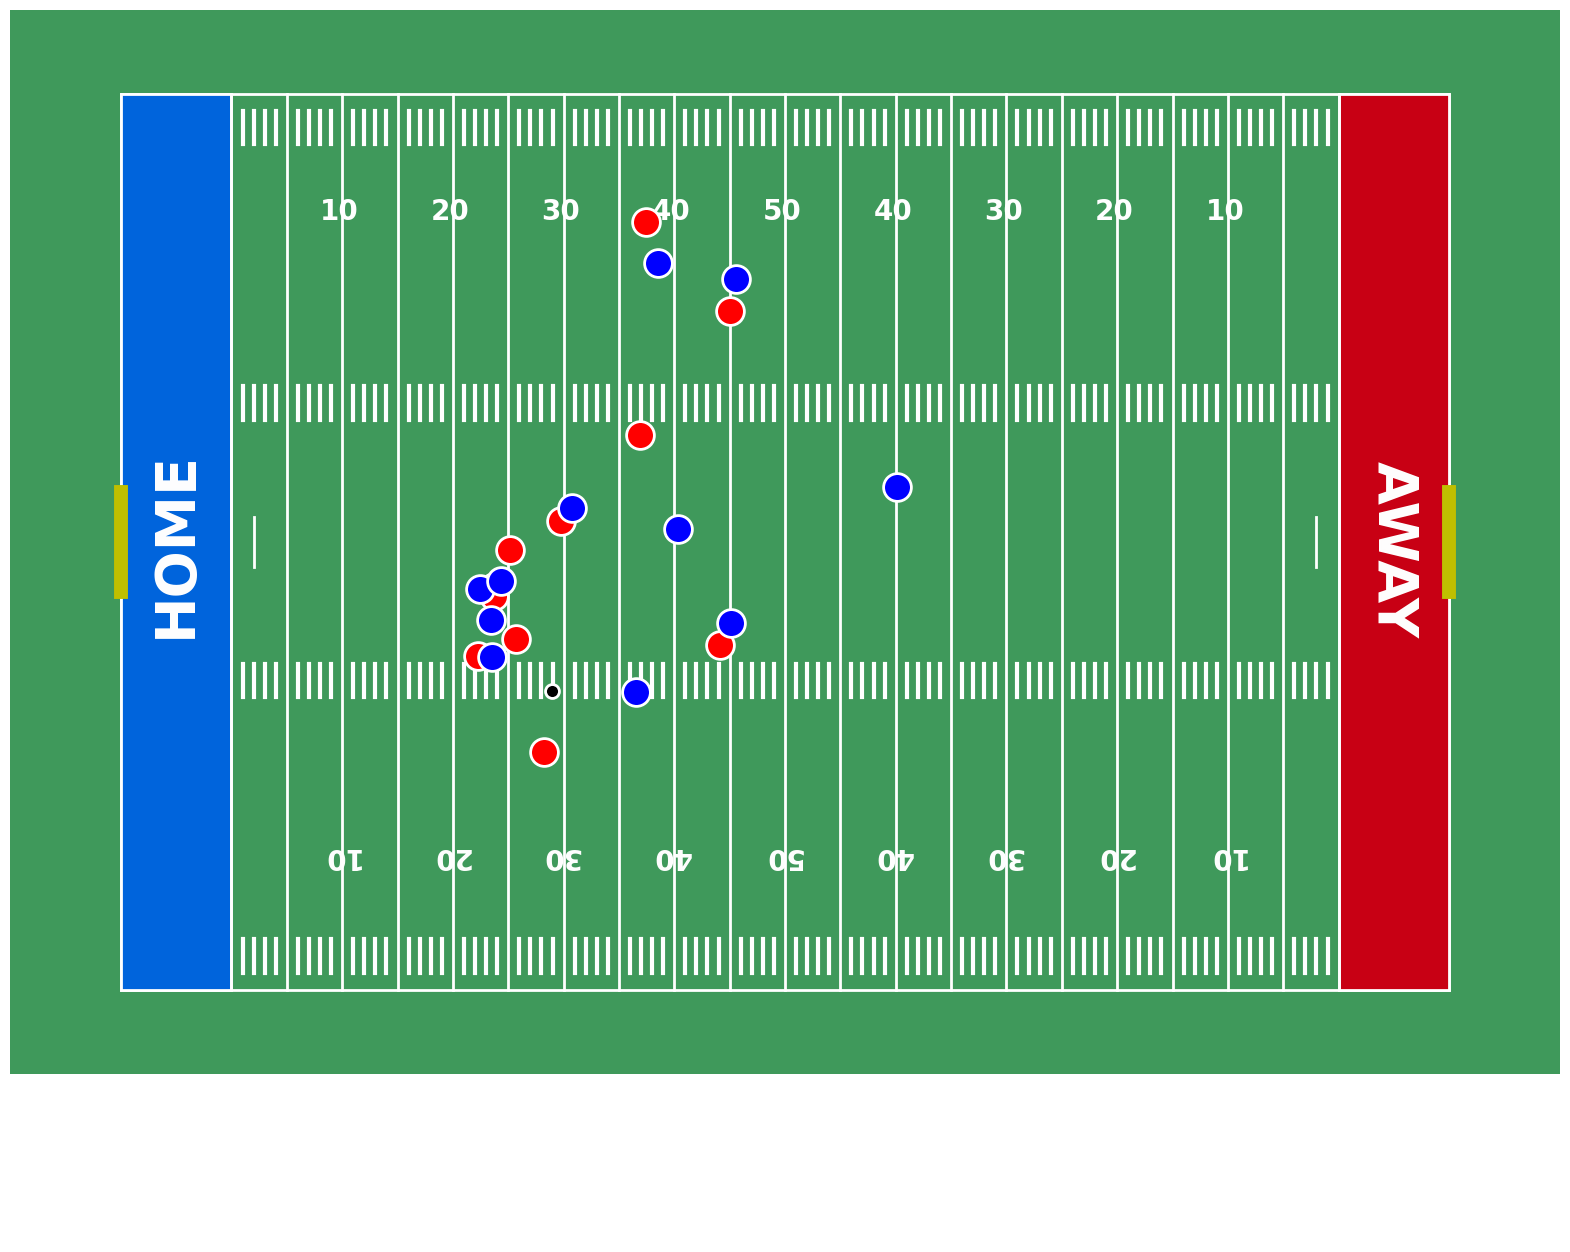

In [197]:
# Extract info from the play
team1, team2, ball = extractPlay(week1_data, "2021090900", "97")

# Plot the play
animatePlay_Generic(team1, team2, ball, drawPitch())

## 2.2 Pocket Visualization

The pocket can be visualized using a similar approach (creating rectangles) with some dynamic information. Two approaches will be explored:
- Static pocket, placed initially where the ball is located
- Dynamic pocket, following the QB

In [198]:
# These functions will be later integrated with Bryce's pocket code
def drawPocket(width = 30):

    # Create figure object
    fig = plt.figure(figsize=(15, 15))
    ax = plt.axes(xlim=(-10 - width/2, width/2 + 10), ylim=(-10 - width/2, width/2 + 10))
    plt.axis('off')

    ###################
    # Create rectangle - Entire field
    # xy = Anchor point
    # width = Length of the field (included side of the field, 10 yards)
    # height = Height of the field (included side of the field, 5 yards)
    rect = patches.Rectangle(
        xy = (-5 - width/2, -5 - width/2), 
        height = width + 10, 
        width = width + 10, 
        linewidth=1, 
        facecolor='#3f995b', 
        capstyle='round'
        )
    ax.add_patch(rect)
    ###################

    ###################
    # Create a set of rectangle - Playable pitch + 2 endzones (10 yards)
    rect = plt.Rectangle((-width/2, -width/2), width, width, ec="w", fc="None", lw=2)
    ax.add_patch(rect)
    ###################

    ###################
    # Plot the center of the square
    plt.plot(0, 0, marker="x", c="w", lw=2)
    ###################
    
    return fig, ax


In [199]:
def preprocessPlay_refBallInit(team1, team2, ball):

    # Extract ball initial position
    initial_x, initial_y = ball.loc[ball.frameId == 1, ['x', 'y']].values.flatten()

    # All coordinates are now placed referenced to these coordinates
    elements = [team1, team2, ball]
    for element in elements:
        element['x'] = element.x - initial_x
        element['y'] = element.y - initial_y

    return team1, team2, ball

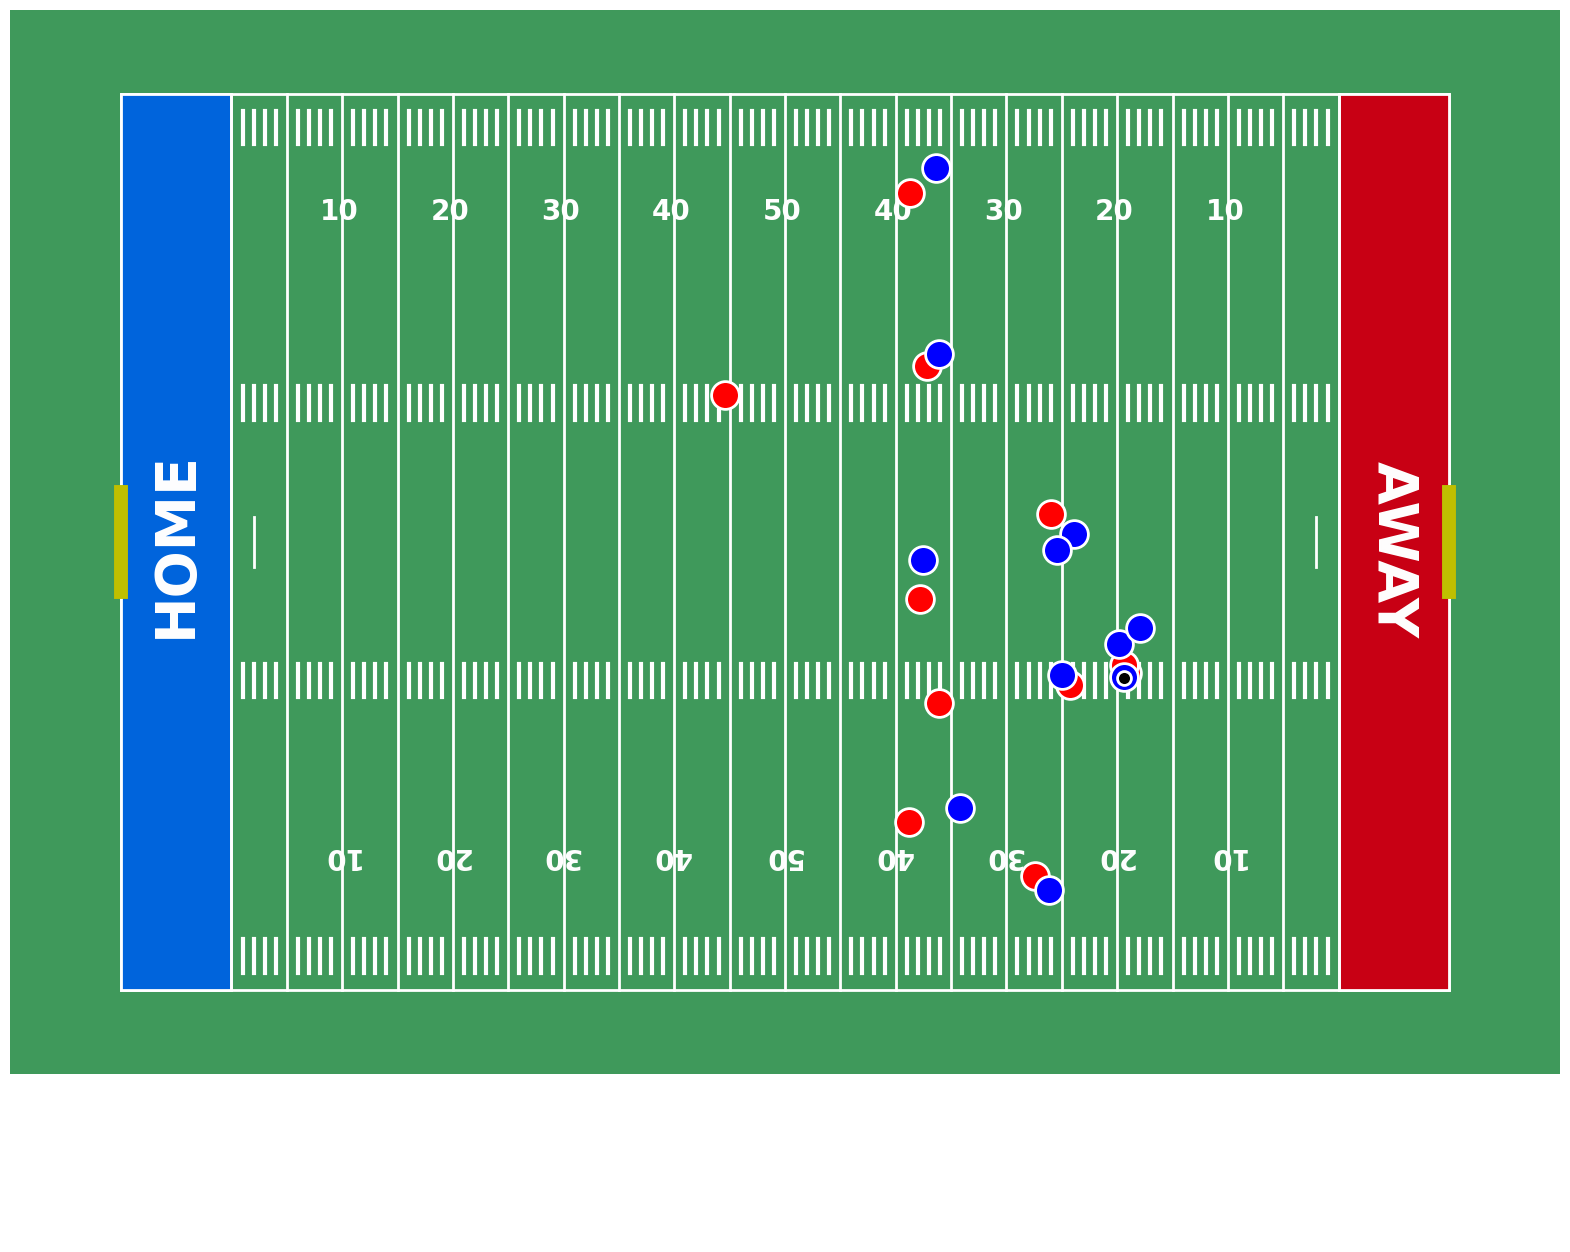

In [200]:
# Extract info from the play
team1, team2, ball = extractPlay(week1_data, "2021091206", "742")

# Plot the play
animatePlay_Generic(team1, team2, ball, drawPitch())

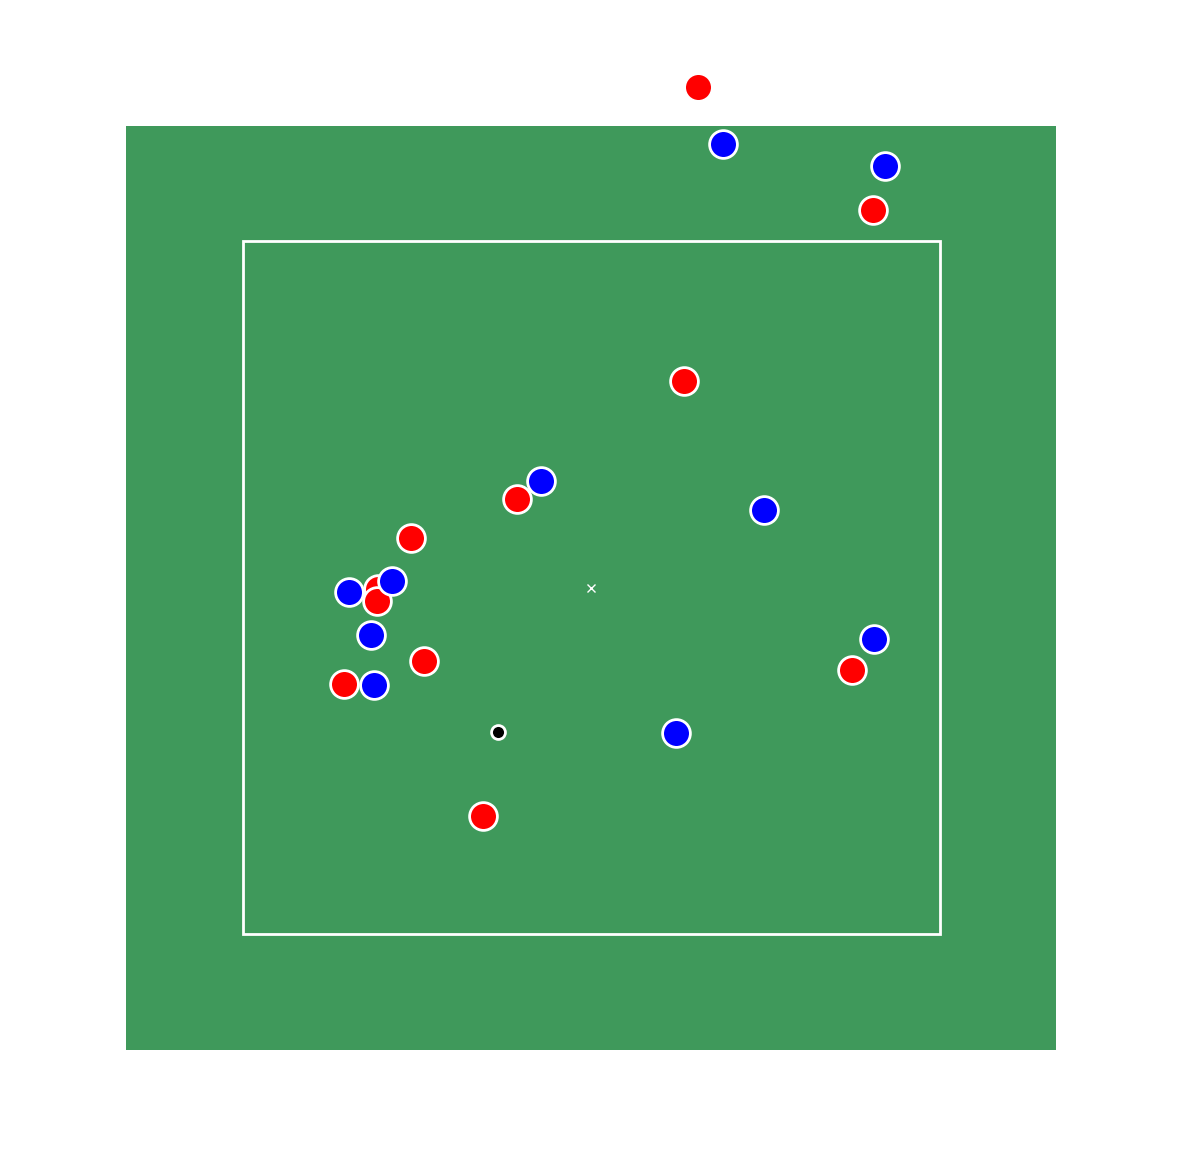

In [201]:
# Extract info from the play
team1, team2, ball = extractPlay(week1_data, "2021090900", "97")
team1, team2, ball = preprocessPlay_refBallInit(team1, team2, ball)

# Plot the play
animatePlay_Generic(team1, team2, ball, drawPocket())

In [314]:
def preprocessPlay_refQB(team1, team2, ball, input_path = "../input/"):

    # Extract which team from the offensive team is the QB
    # - Obtain list of players
    list_players = team1.nflId.unique().tolist()
    # - Extract QB ID
    qb_id = pd.read_csv(os.path.join(input_path, 'players.csv')).query("nflId == @list_players & officialPosition == 'QB'").nflId.values.flatten()[0]

    # Extract QB positions across the different frames
    qb_ref = team1.loc[team1.nflId == qb_id, ['frameId', 'x', 'y']].sort_values(['frameId']).set_index('frameId')

    # All coordinates are now placed referenced to the QB coordinates
    elements = [team1, team2, ball]
    num_frames = len(ball)
    for element in elements:
        for frame in range(num_frames):
            ref_x, ref_y = qb_ref.iloc[frame].values
            element.loc[element.frameId == frame, 'x'] = element.loc[element.frameId == frame, 'x'] - ref_x
            element.loc[element.frameId == frame, 'y'] = element.loc[element.frameId == frame, 'y'] - ref_y
        
        # I tried to do this with GroupBy and it simply doesn't like it
        # element['y'] = element.groupby['nlfId'].apply(lambda player: player.y - qb_ref.y)

    return team1, team2, ball

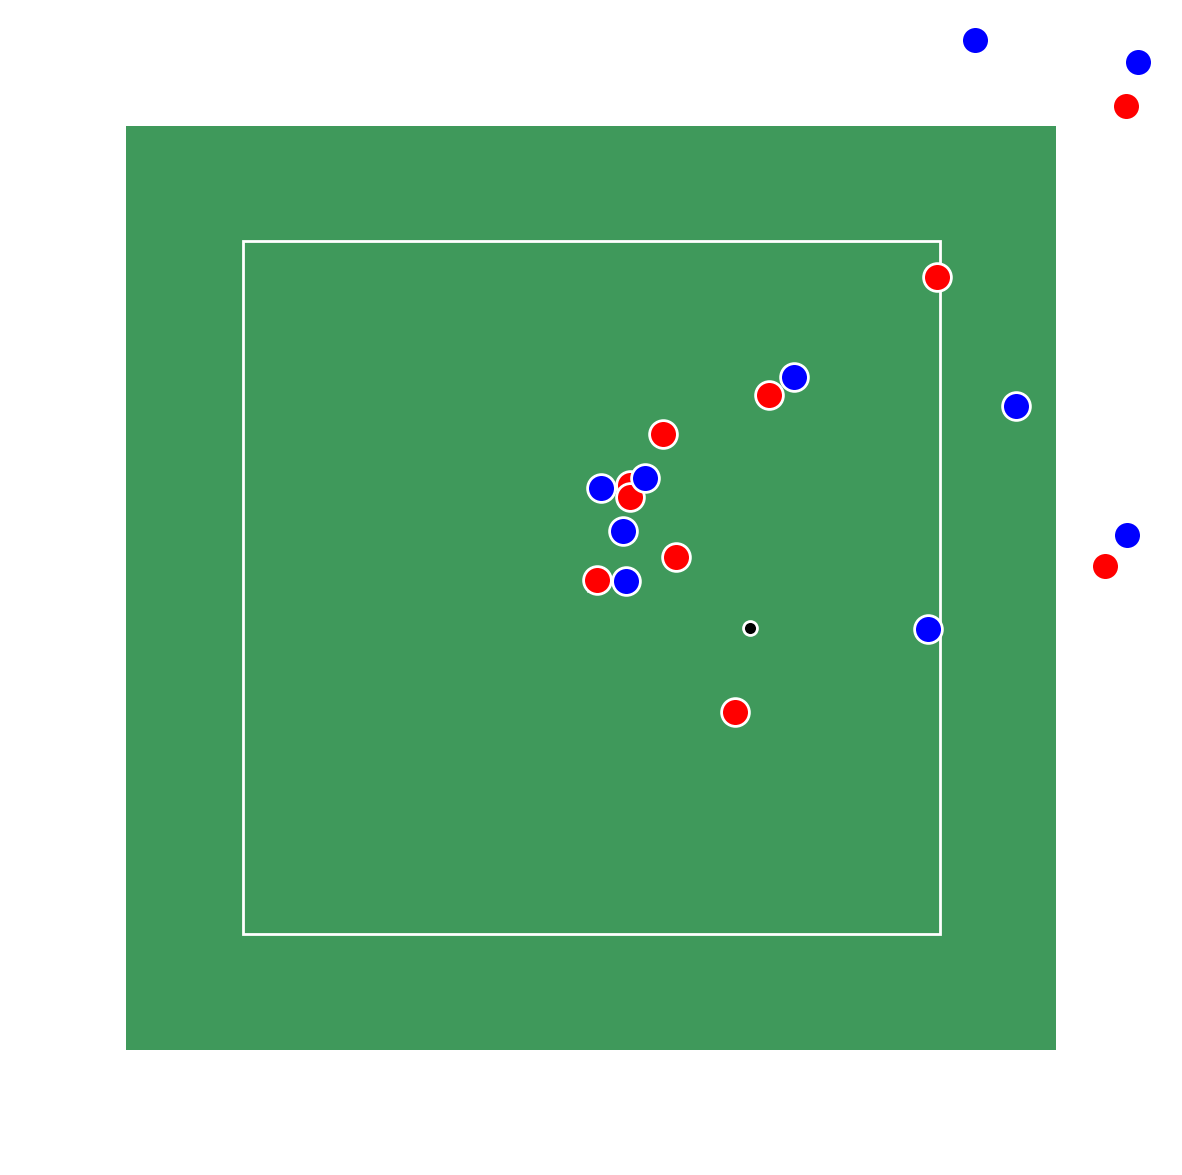

In [317]:
# Extract info from the play
team1, team2, ball = extractPlay(week1_data, "2021090900", "97")
team1, team2, ball = preprocessPlay_refQB(team1, team2, ball)

# Plot the play
animatePlay_Generic(team1, team2, ball, drawPocket())

# 3. Utils Validation

This section validates the recently created functions for pre-processing and visualization

Note: Need to restart kernel to ensure this works properly

In [3]:
from src.utils.viz_functions import drawPitch, drawPocket, animatePlay_Generic
from src.utils.play_preprocessing import extractPlay, preprocessPlay_refBallInit, preprocessPlay_refQB


In [4]:
# Define input parameters
input_path = '../input'

In [5]:
week1_data = pd.read_csv(os.path.join(input_path, 'week1.csv'))
week1_data.head(5)

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


### Test full pitch drawing

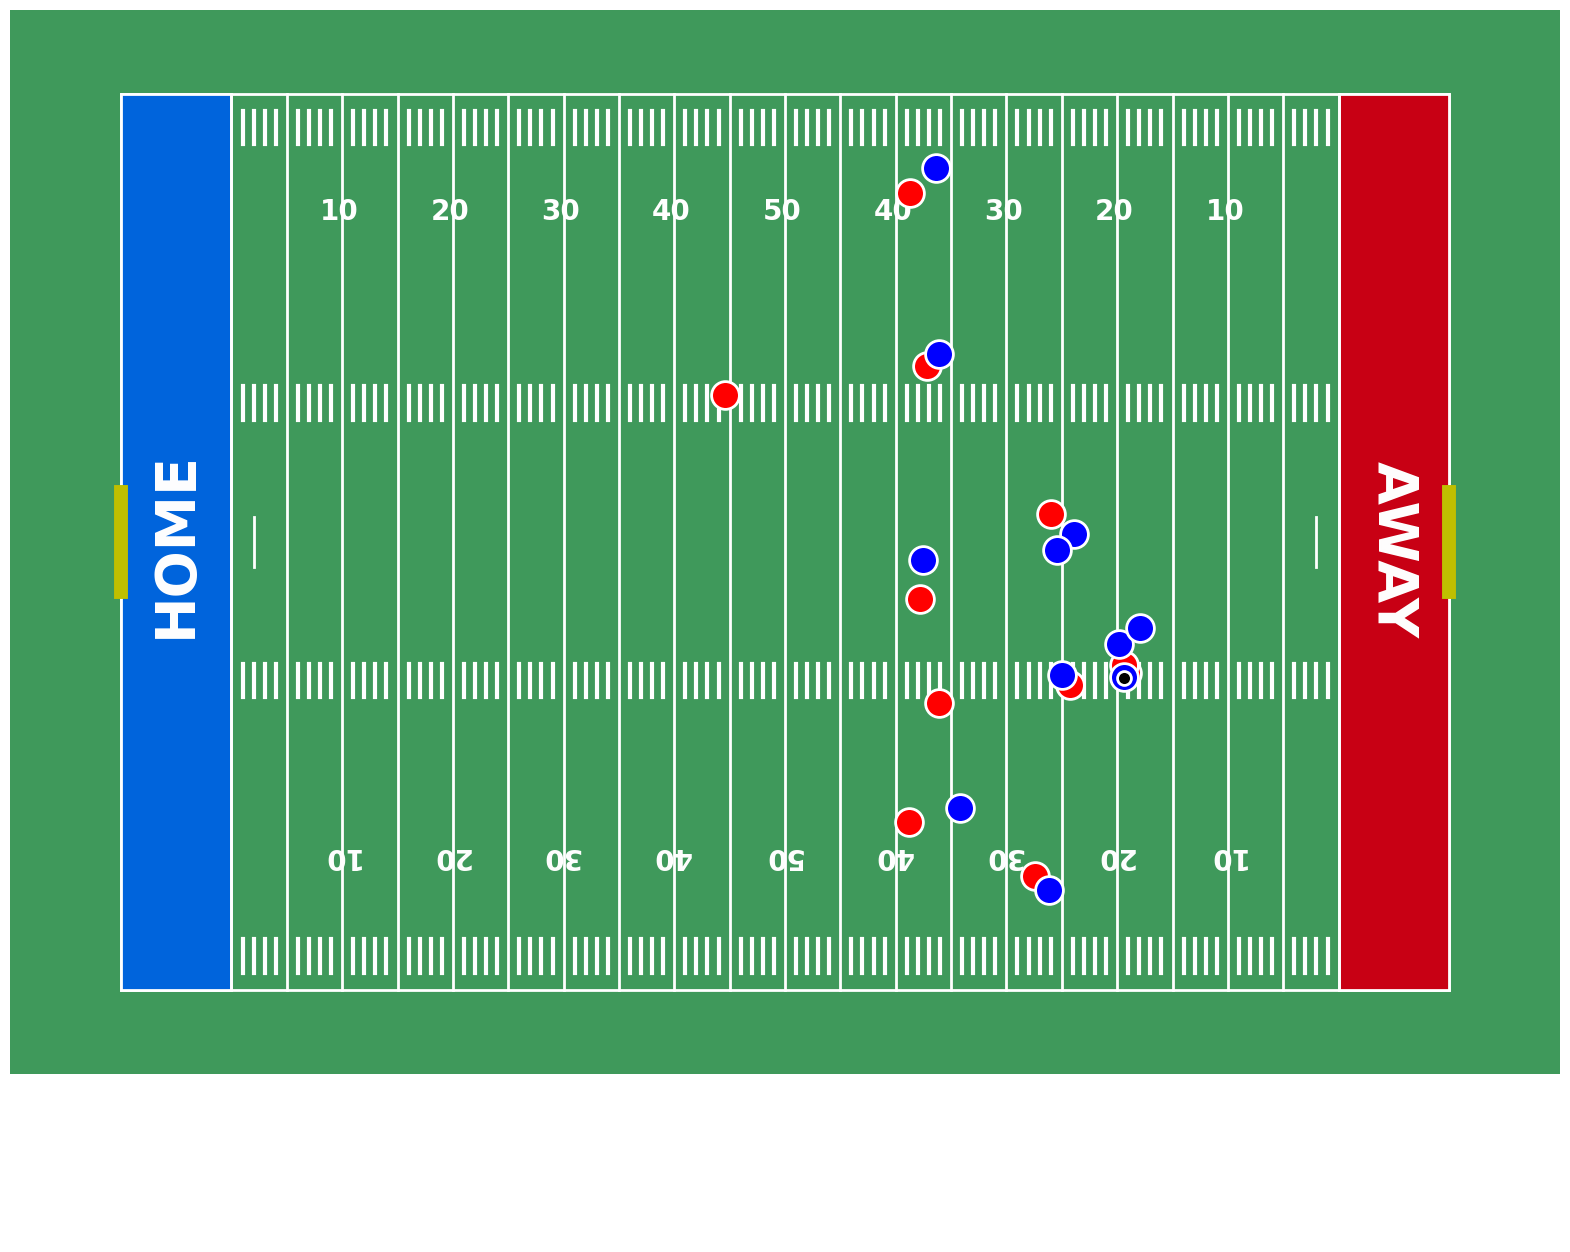

In [6]:
# Extract info from the play
team1, team2, ball = extractPlay(week1_data, "2021091206", "742")

# Plot the play
animatePlay_Generic(team1, team2, ball, drawPitch())

### Test pocket drawing with ball normalization

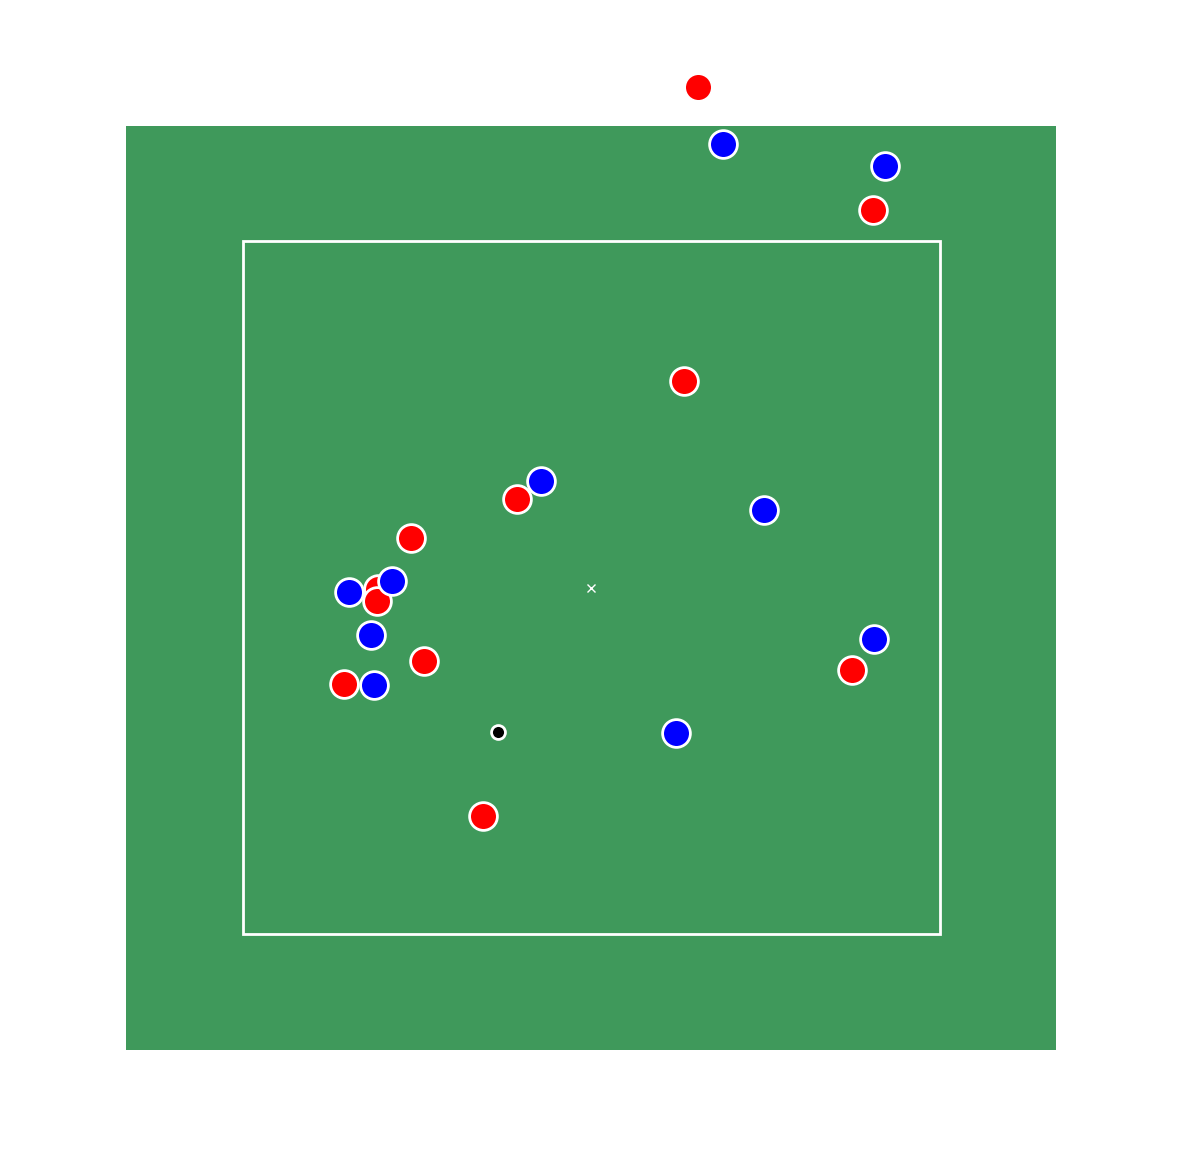

In [7]:
# Extract info from the play
team1, team2, ball = extractPlay(week1_data, "2021090900", "97")
team1, team2, ball = preprocessPlay_refBallInit(team1, team2, ball)

# Plot the play
animatePlay_Generic(team1, team2, ball, drawPocket())

### Test pocket drawing with QB normalization

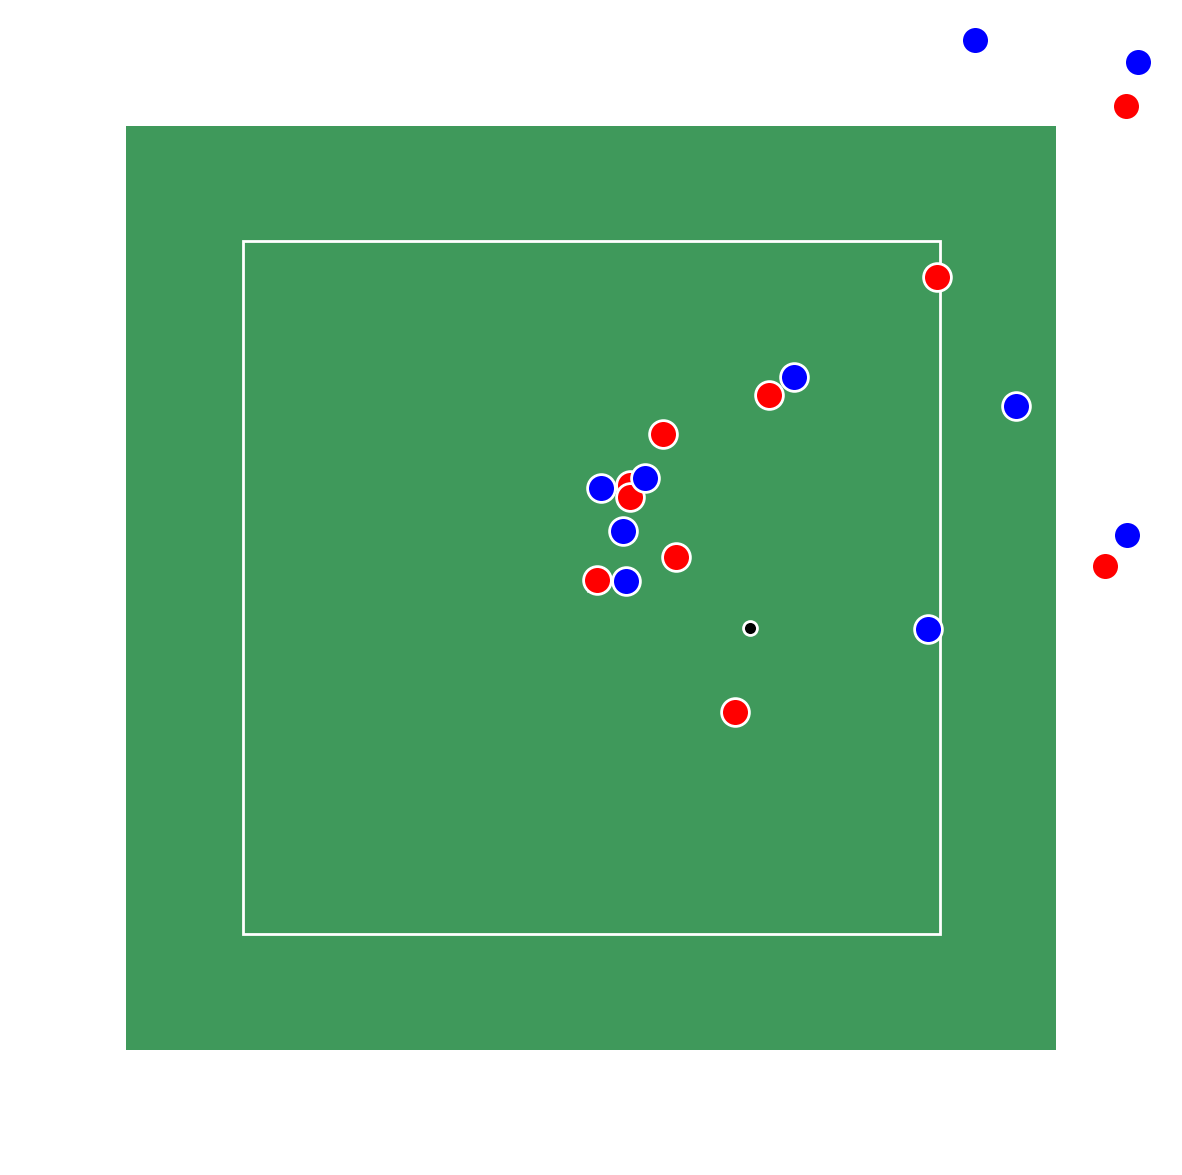

In [8]:
# Extract info from the play
team1, team2, ball = extractPlay(week1_data, "2021090900", "97")
team1, team2, ball = preprocessPlay_refQB(team1, team2, ball)

# Plot the play
animatePlay_Generic(team1, team2, ball, drawPocket())